# Test 

In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [28]:
data = pd.read_csv("log_exp.csv")
data

,name,seq,h1,h2,rnn,h0
0,1,20,400,300,512,0
1,2,15,400,300,128,1
2,3,20,400,300,128,1
3,4,15,400,300,256,1
4,5,15,256,256,256,1
5,6,20,400,300,256,1
6,7,20,400,300,128,0
7,8,20,256,256,256,0
8,9,15,400,300,512,0
9,10,15,400,300,256,0


In [29]:
x = data.set_index("seq")
x

,name,h1,h2,rnn,h0
seq,,,,,
20,1,400,300,512,0
15,2,400,300,128,1
20,3,400,300,128,1
15,4,400,300,256,1
15,5,256,256,256,1
20,6,400,300,256,1
20,7,400,300,128,0
20,8,256,256,256,0
15,9,400,300,512,0


In [30]:
x = x.sort_index()
x
# x.set_index("rnn")

,name,h1,h2,rnn,h0
seq,,,,,
15,2,400,300,128,1
15,4,400,300,256,1
15,5,256,256,256,1
15,9,400,300,512,0
15,10,400,300,256,0
15,11,256,256,256,0
15,12,400,300,128,0
20,1,400,300,512,0
20,3,400,300,128,1


In [31]:
d = data.sort_values(["seq", "rnn", "h0", "h1"])
d = d.set_index(["seq", "rnn", "h0", "h1", "h2"])
d

name
seq rnn h0 h1  h2       
15  128 0  400 300    12
        1  400 300     2
    256 0  256 256    11
           400 300    10
        1  256 256     5
           400 300     4
    512 0  400 300     9
20  128 0  400 300     7
        1  400 300     3
    256 0  256 256     8
        1  400 300     6
    512 0  400 300     1

In [32]:
d.reset_index("seq")

seq  name
rnn h0 h1  h2            
128 0  400 300   15    12
    1  400 300   15     2
256 0  256 256   15    11
       400 300   15    10
    1  256 256   15     5
       400 300   15     4
512 0  400 300   15     9
128 0  400 300   20     7
    1  400 300   20     3
256 0  256 256   20     8
    1  400 300   20     6
512 0  400 300   20     1

In [33]:
d.unstack("h0").fillna("")

name   
h0                 0  1
seq rnn h1  h2         
15  128 400 300   12  2
    256 256 256   11  5
        400 300   10  4
    512 400 300    9   
20  128 400 300    7  3
    256 256 256    8   
        400 300       6
    512 400 300    1

In [43]:
import glob
file_list = glob.glob("/home/gu/project/DRL/data/cudnn_L1_BipedalWalkerHardcore-v2*_repeat_*")

In [44]:
file_list

['/home/gu/project/DRL/data/cudnn_L1_BipedalWalkerHardcore-v2_seq_20_mlp_400_300_rnn_256_obs_obs_act_h0_0.0_alpha_auto_opt_q_beta_0.0_norm_False_tm_1_repeat_3',
 '/home/gu/project/DRL/data/cudnn_L1_BipedalWalkerHardcore-v2_seq_15_mlp_400_300_rnn_128_obs_obs_act_h0_1.0_alpha_auto_opt_q_beta_0.0_norm_False_tm_1_repeat_3',
 '/home/gu/project/DRL/data/cudnn_L1_BipedalWalkerHardcore-v2_seq_15_mlp_256_256_rnn_256_obs_obs_act_h0_0.0_alpha_auto_opt_q_beta_0.0_norm_False_tm_1_repeat_3',
 '/home/gu/project/DRL/data/cudnn_L1_BipedalWalkerHardcore-v2_seq_15_mlp_400_300_rnn_512_obs_obs_act_h0_0.0_alpha_auto_opt_q_beta_0.0_norm_False_tm_1_repeat_3',
 '/home/gu/project/DRL/data/cudnn_L1_BipedalWalkerHardcore-v2_seq_20_mlp_400_300_rnn_128_obs_obs_act_h0_0.0_alpha_auto_opt_q_beta_0.0_norm_False_tm_1_repeat_3',
 '/home/gu/project/DRL/data/cudnn_L1_BipedalWalkerHardcore-v2_seq_15_mlp_400_300_rnn_128_obs_obs_act_h0_0.0_alpha_auto_opt_q_beta_0.0_norm_False_tm_1_repeat_3',
 '/home/gu/project/DRL/data/cudnn_

In [45]:
name = file_list[1]
name

'/home/gu/project/DRL/data/cudnn_L1_BipedalWalkerHardcore-v2_seq_15_mlp_400_300_rnn_128_obs_obs_act_h0_1.0_alpha_auto_opt_q_beta_0.0_norm_False_tm_1_repeat_3'

In [46]:
import re
re.findall('\d+', name)

['1', '2', '15', '400', '300', '128', '0', '1', '0', '0', '0', '1', '3']

In [47]:
l = re.findall('\d+', name)
[int(x) for x in l]

[1, 2, 15, 400, 300, 128, 0, 1, 0, 0, 0, 1, 3]

In [48]:
info = []
for name in file_list:
    l = re.findall('\d+', name) 
    info.append([int(x) for x in l])
info

[[1, 2, 20, 400, 300, 256, 0, 0, 0, 0, 0, 1, 3],
 [1, 2, 15, 400, 300, 128, 0, 1, 0, 0, 0, 1, 3],
 [1, 2, 15, 256, 256, 256, 0, 0, 0, 0, 0, 1, 3],
 [1, 2, 15, 400, 300, 512, 0, 0, 0, 0, 0, 1, 3],
 [1, 2, 20, 400, 300, 128, 0, 0, 0, 0, 0, 1, 3],
 [1, 2, 15, 400, 300, 128, 0, 0, 0, 0, 0, 1, 3],
 [1, 2, 15, 400, 300, 256, 0, 0, 0, 0, 0, 1, 3],
 [1, 2, 15, 256, 256, 256, 0, 1, 0, 0, 0, 1, 3],
 [1, 2, 20, 400, 300, 512, 0, 1, 0, 0, 0, 1, 3],
 [1, 2, 15, 400, 300, 256, 0, 1, 0, 0, 0, 1, 3],
 [1, 2, 20, 400, 300, 128, 0, 1, 0, 0, 0, 1, 3],
 [1, 2, 20, 256, 256, 256, 0, 0, 0, 0, 0, 1, 3],
 [1, 2, 20, 400, 300, 256, 0, 1, 0, 0, 0, 1, 3]]

In [54]:
exp_info_ = pd.DataFrame(info)
exp_info_

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1,2,20,400,300,256,0,0,0,0,0,1,3
1,1,2,15,400,300,128,0,1,0,0,0,1,3
2,1,2,15,256,256,256,0,0,0,0,0,1,3
3,1,2,15,400,300,512,0,0,0,0,0,1,3
4,1,2,20,400,300,128,0,0,0,0,0,1,3
5,1,2,15,400,300,128,0,0,0,0,0,1,3
6,1,2,15,400,300,256,0,0,0,0,0,1,3
7,1,2,15,256,256,256,0,1,0,0,0,1,3
8,1,2,20,400,300,512,0,1,0,0,0,1,3
9,1,2,15,400,300,256,0,1,0,0,0,1,3


In [64]:
exp_info = exp_info_[[2, 3, 4, 5, 7, 10, 11, 12]]
exp_info.columns=["seq", "h1", "h2", "state", "h0", "beta", "tm", "repeat"]
exp_info

,seq,h1,h2,state,h0,beta,tm,repeat
0,20,400,300,256,0,0,1,3
1,15,400,300,128,1,0,1,3
2,15,256,256,256,0,0,1,3
3,15,400,300,512,0,0,1,3
4,20,400,300,128,0,0,1,3
5,15,400,300,128,0,0,1,3
6,15,400,300,256,0,0,1,3
7,15,256,256,256,1,0,1,3
8,20,400,300,512,1,0,1,3
9,15,400,300,256,1,0,1,3


# Function 

In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
import glob
import re
def read_dir(dir_path="/home/gu/project/DRL/data/cudnn_L1_BipedalWalkerHardcore-v2*_repeat_*"):
    pd.options.mode.chained_assignment = None
    file_list = glob.glob(dir_path)
    info = []
    for name in file_list:
        l = re.findall('\d+', name) 
        info.append([int(x) for x in l])
    info = pd.DataFrame(info)
    exp_info = info[[2, 3, 4, 5, 7, 10, 11, 12]]
    exp_info.columns=["seq", "h1", "h2", "state", "h0", "beta", "tm", "repeat"]
    exp_info.loc[:, "name"] = range(1, len(exp_info)+1)
    return exp_info

In [25]:
dt = read_dir()
dt

,seq,h1,h2,state,h0,beta,tm,repeat,name
0,20,400,300,256,0,0,1,3,1
1,15,400,300,128,1,0,1,3,2
2,15,256,256,256,0,0,1,3,3
3,15,400,300,512,0,0,1,3,4
4,20,400,300,128,0,0,1,3,5
5,15,400,300,128,0,0,1,3,6
6,15,400,300,256,0,0,1,3,7
7,15,256,256,256,1,0,1,3,8
8,20,400,300,512,1,0,1,3,9
9,15,400,300,256,1,0,1,3,10


In [26]:
# dt.sort_values("seq").set_index(["seq", "name"])
dt.sort_values("state").set_index(["state", "name"])

seq   h1   h2  h0  beta  tm  repeat
state name                                     
128   2      15  400  300   1     0   1       3
      5      20  400  300   0     0   1       3
      6      15  400  300   0     0   1       3
      11     20  400  300   1     0   1       3
256   1      20  400  300   0     0   1       3
      3      15  256  256   0     0   1       3
      7      15  400  300   0     0   1       3
      8      15  256  256   1     0   1       3
      10     15  400  300   1     0   1       3
      12     20  256  256   0     0   1       3
      13     20  400  300   1     0   1       3
512   4      15  400  300   0     0   1       3
      9      20  400  300   1     0   1       3

In [27]:
dt.set_index(["seq", "h1", "h2", "h0", "beta", "tm", "repeat", "state"]).sort_index()

name
seq h1  h2  h0 beta tm repeat state      
15  256 256 0  0    1  3      256       3
            1  0    1  3      256       8
    400 300 0  0    1  3      128       6
                              256       7
                              512       4
            1  0    1  3      128       2
                              256      10
20  256 256 0  0    1  3      256      12
    400 300 0  0    1  3      128       5
                              256       1
            1  0    1  3      128      11
                              256      13
                              512       9

In [28]:
dt.set_index(["seq", "h1", "h2", "h0", "beta", "tm", "repeat", "state"]).sort_index().unstack()

name           
state                           128   256  512
seq h1  h2  h0 beta tm repeat                 
15  256 256 0  0    1  3        NaN   3.0  NaN
            1  0    1  3        NaN   8.0  NaN
    400 300 0  0    1  3        6.0   7.0  4.0
            1  0    1  3        2.0  10.0  NaN
20  256 256 0  0    1  3        NaN  12.0  NaN
    400 300 0  0    1  3        5.0   1.0  NaN
            1  0    1  3       11.0  13.0  9.0

In [29]:
dt.set_index(["seq", "h1", "h2", "h0", "beta", "tm", "repeat", "state"]).sort_index()

name
seq h1  h2  h0 beta tm repeat state      
15  256 256 0  0    1  3      256       3
            1  0    1  3      256       8
    400 300 0  0    1  3      128       6
                              256       7
                              512       4
            1  0    1  3      128       2
                              256      10
20  256 256 0  0    1  3      256      12
    400 300 0  0    1  3      128       5
                              256       1
            1  0    1  3      128      11
                              256      13
                              512       9

In [30]:
l = dt.columns
l[l != "seq"]

Index(['h1', 'h2', 'state', 'h0', 'beta', 'tm', 'repeat', 'name'], dtype='object')

In [31]:
l = dt.columns
l

Index(['seq', 'h1', 'h2', 'state', 'h0', 'beta', 'tm', 'repeat', 'name'], dtype='object')

In [32]:
list(l)

['seq', 'h1', 'h2', 'state', 'h0', 'beta', 'tm', 'repeat', 'name']

In [33]:
d = dt.set_index(list(l[l != "name"])).sort_index().unstack("state").fillna(0).astype('int64')
d[d==0] = ""
d

name        
state                          128 256 512
seq h1  h2  h0 beta tm repeat             
15  256 256 0  0    1  3             3    
            1  0    1  3             8    
    400 300 0  0    1  3         6   7   4
            1  0    1  3         2  10    
20  256 256 0  0    1  3            12    
    400 300 0  0    1  3         5   1    
            1  0    1  3        11  13   9

In [34]:
dt.set_index(["seq", "h1", "h2", "h0", "beta", "tm", "repeat", "state", "name"]).sort_index()

Empty DataFrame
Columns: []
Index: [(15, 256, 256, 0, 0, 1, 3, 256, 3), (15, 256, 256, 1, 0, 1, 3, 256, 8), (15, 400, 300, 0, 0, 1, 3, 128, 6), (15, 400, 300, 0, 0, 1, 3, 256, 7), (15, 400, 300, 0, 0, 1, 3, 512, 4), (15, 400, 300, 1, 0, 1, 3, 128, 2), (15, 400, 300, 1, 0, 1, 3, 256, 10), (20, 256, 256, 0, 0, 1, 3, 256, 12), (20, 400, 300, 0, 0, 1, 3, 128, 5), (20, 400, 300, 0, 0, 1, 3, 256, 1), (20, 400, 300, 1, 0, 1, 3, 128, 11), (20, 400, 300, 1, 0, 1, 3, 256, 13), (20, 400, 300, 1, 0, 1, 3, 512, 9)]

In [35]:
d = dt.set_index(list(l[l != "name"])).sort_index().unstack("seq").fillna(0).astype('int64')
d[d==0] = ""
d

name    
seq                               15  20
h1  h2  state h0 beta tm repeat         
256 256 256   0  0    1  3         3  12
              1  0    1  3         8    
400 300 128   0  0    1  3         6   5
              1  0    1  3         2  11
        256   0  0    1  3         7   1
              1  0    1  3        10  13
        512   0  0    1  3         4    
              1  0    1  3             9

In [36]:
def exp_compare(dt, param="seq"):
    d = dt.set_index(list(l[l != "name"])).sort_index().unstack(param).fillna(0).astype('int64')
    d[d==0] = ""
    return d

In [37]:
dt = read_dir()
dt

,seq,h1,h2,state,h0,beta,tm,repeat,name
0,20,400,300,256,0,0,1,3,1
1,15,400,300,128,1,0,1,3,2
2,15,256,256,256,0,0,1,3,3
3,15,400,300,512,0,0,1,3,4
4,20,400,300,128,0,0,1,3,5
5,15,400,300,128,0,0,1,3,6
6,15,400,300,256,0,0,1,3,7
7,15,256,256,256,1,0,1,3,8
8,20,400,300,512,1,0,1,3,9
9,15,400,300,256,1,0,1,3,10


In [40]:
exp_compare(dt, param="h1")

name    
h1                               256 400
seq h2  state h0 beta tm repeat         
15  256 256   0  0    1  3         3    
              1  0    1  3         8    
    300 128   0  0    1  3             6
              1  0    1  3             2
        256   0  0    1  3             7
              1  0    1  3            10
        512   0  0    1  3             4
20  256 256   0  0    1  3        12    
    300 128   0  0    1  3             5
              1  0    1  3            11
        256   0  0    1  3             1
              1  0    1  3            13
        512   1  0    1  3             9

# Function 2 

In [41]:
import glob
import re
def read_dir(dir_path="/home/gu/project/DRL/data/cudnn_L1_BipedalWalkerHardcore-v2*_repeat_*"):
    pd.options.mode.chained_assignment = None
    file_list = glob.glob(dir_path)
    info = []
    for name in file_list:
        l = re.findall('\d+', name) 
        info.append([int(x) for x in l])
    info = pd.DataFrame(info)
    exp_info = info[[2, 3, 4, 5, 7, 10, 11, 12]]
    exp_info.columns=["seq", "h1", "h2", "state", "h0", "beta", "tm", "repeat"]
    exp_info.loc[:, "name"] = range(1, len(exp_info)+1)
    return exp_info

In [42]:
def exp_compare(dt, param="seq"):
    d = dt.set_index(list(l[l != "name"])).sort_index().unstack(param).fillna(0).astype('int64')
    d[d==0] = ""
    return d

In [43]:
exp_compare(read_dir())

name    
seq                               15  20
h1  h2  state h0 beta tm repeat         
256 256 256   0  0    1  3         3  12
              1  0    1  3         8    
400 300 128   0  0    1  3         6   5
              1  0    1  3         2  11
        256   0  0    1  3         7   1
              1  0    1  3        10  13
        512   0  0    1  3         4    
              1  0    1  3             9

In [44]:
df = read_dir()
df

,seq,h1,h2,state,h0,beta,tm,repeat,name
0,20,400,300,256,0,0,1,3,1
1,15,400,300,128,1,0,1,3,2
2,15,256,256,256,0,0,1,3,3
3,15,400,300,512,0,0,1,3,4
4,20,400,300,128,0,0,1,3,5
5,15,400,300,128,0,0,1,3,6
6,15,400,300,256,0,0,1,3,7
7,15,256,256,256,1,0,1,3,8
8,20,400,300,512,1,0,1,3,9
9,15,400,300,256,1,0,1,3,10


In [62]:
df["hidden"] = df["h1"].apply(lambda x: [x]) + df["h2"].apply(lambda x: [x])
df = df.drop(["h1", "h2"], axis=1)
df

,seq,state,h0,beta,tm,repeat,name,hidden
0,20,256,0,0,1,3,1,"[400, 300]"
1,15,128,1,0,1,3,2,"[400, 300]"
2,15,256,0,0,1,3,3,"[256, 256]"
3,15,512,0,0,1,3,4,"[400, 300]"
4,20,128,0,0,1,3,5,"[400, 300]"
5,15,128,0,0,1,3,6,"[400, 300]"
6,15,256,0,0,1,3,7,"[400, 300]"
7,15,256,1,0,1,3,8,"[256, 256]"
8,20,512,1,0,1,3,9,"[400, 300]"
9,15,256,1,0,1,3,10,"[400, 300]"


# Function 3 

In [93]:
import glob
import re
def read_dir(dir_path="/home/gu/project/DRL/data/cudnn_L1_BipedalWalkerHardcore-v2*_repeat_*"):
    pd.options.mode.chained_assignment = None
    file_list = glob.glob(dir_path)
    info = []
    for name in file_list:
        l = re.findall('\d+', name) 
        info.append([int(x) for x in l])
    info = pd.DataFrame(info)
    exp_info = info[[2, 3, 4, 5, 7, 10, 11, 12]]
    exp_info.columns=["seq", "h1", "h2", "state", "h0", "beta", "tm", "repeat"]
    exp_info.loc[:, "name"] = range(1, len(exp_info)+1)
    exp_info["hidden"] = exp_info["h1"].apply(lambda x: str(x)+"_") + exp_info["h2"].apply(lambda x: str(x))
    exp_info = exp_info.drop(["h1", "h2"], axis=1)
    return exp_info


def exp_compare(dt, param="seq"):
    l = dt.columns
    d = dt.set_index(list(l[l != "name"])).sort_index().unstack(param).fillna(0).astype('int64')
    d[d==0] = ""
    return d

In [108]:
dt = read_dir()
dt

,seq,state,h0,beta,tm,repeat,name,hidden
0,15,128,1,0,1,3,1,400_300
1,15,256,0,0,1,3,2,256_256
2,15,512,0,0,1,3,3,400_300
3,20,128,0,0,1,3,4,400_300
4,15,128,0,0,1,3,5,400_300
5,15,256,0,0,1,3,6,400_300
6,15,256,1,0,1,3,7,256_256
7,20,512,1,0,1,3,8,400_300
8,15,256,1,0,1,3,9,400_300
9,20,128,1,0,1,3,10,400_300


In [126]:
exp = exp_compare(dt, "hidden")
exp

name        
hidden                           256_256 400_300
seq state h0 beta tm repeat data                
15  128   0  0    1  3      0                  5
          1  0    1  3      0                  1
    256   0  0    1  3      0          2       6
          1  0    1  3      0          7       9
    512   0  0    1  3      0                  3
20  128   0  0    1  3      0                  4
          1  0    1  3      0                 10
    256   0  0    1  3      0         11        
          1  0    1  3      0                 12
    512   1  0    1  3      0                  8

# Read progress 

In [127]:
d = dt[dt.name==5]
d

,seq,state,h0,beta,tm,repeat,name,hidden,data
4,15,128,0,0,1,3,5,400_300,0


In [131]:
d = d.values
d

array([[15, 128, 0, 0, 1, 3, 5, '400_300', 0]], dtype=object)

In [119]:
data = pd.read_csv("/home/gu/project/DRL/data/cudnn_L1_BipedalWalkerHardcore-v2_seq_20_mlp_400_300_rnn_256_obs_obs_act_h0_1.0_alpha_auto_opt_q_beta_0.0_norm_False_tm_1_repeat_3/cudnn_L1_BipedalWalkerHardcore-v2_seq_20_mlp_400_300_rnn_256_obs_obs_act_h0_1.0_alpha_auto_opt_q_beta_0.0_norm_False_tm_1_repeat_3_s0/progress.txt", delimiter="\t")
data.head()

,Epoch,Episode,name,AverageEpRet,StdEpRet,MaxEpRet,MinEpRet,AverageTestEpRet,StdTestEpRet,MaxTestEpRet,...,MaxQ2Vals,MinQ2Vals,AverageLogPi,StdLogPi,MaxLogPi,MinLogPi,LossPi,LossQ1,LossQ2,Time
0,1,27,cudnn_L1_BipedalWalkerHardcore-v2_seq_20_mlp_4...,-29.326302,33.281128,-1.820735,-117.006650,-10.456229,11.090093,-4.532325,...,97.30976,-7.279265,-2.630740,0.988279,33.463024,-10.288488,-51.799137,2.939590,2.967709,122.138081
1,2,51,cudnn_L1_BipedalWalkerHardcore-v2_seq_20_mlp_4...,-25.941137,33.133163,-1.941111,-122.988690,-13.439173,2.291420,-12.054634,...,141.27861,-6.722457,-2.583930,0.606439,4.722868,-11.997187,-109.408070,1.362189,1.375266,221.967793
2,3,93,cudnn_L1_BipedalWalkerHardcore-v2_seq_20_mlp_4...,-21.501225,25.435568,0.896658,-104.083920,-165.371770,77.070366,-11.231132,...,198.60014,-11.977525,-2.432655,0.962145,14.318497,-12.375860,-138.988190,1.751715,1.756133,342.435085
3,4,100,cudnn_L1_BipedalWalkerHardcore-v2_seq_20_mlp_4...,-70.794430,33.925194,-15.170213,-112.700264,-20.344715,3.203766,-17.099514,...,266.13950,-12.904983,-2.236208,1.361532,16.500813,-14.451267,-149.360380,1.904633,1.890446,453.552867
4,5,105,cudnn_L1_BipedalWalkerHardcore-v2_seq_20_mlp_4...,-85.338295,23.467386,-44.736412,-107.505630,-18.801601,1.711856,-17.145195,...,218.65822,-11.894253,-2.249191,1.379998,21.478594,-13.329161,-153.978260,1.456681,1.443366,557.579286


In [ ]:
path = "/home/gu/project/DRL/data/cudnn_L1_BipedalWalkerHardcore-v2"
name = path + '_seq_{}_mlp_{}_{}_rnn_{}_obs_{}_h0_{}_alpha_{}_opt_{}_beta_{}_norm_{}_tm_{}_repeat_{}'.format(
    d[0],
    d[,
    parser.parse_args().hid2,
    parser.parse_args().state,
    "obs_act",
    parser.parse_args().h0,
    parser.parse_args().alpha,
    # parser.parse_args().model,
    parser.parse_args().opt,
    parser.parse_args().beta,
    False,
    parser.parse_args().tm,
    parser.parse_args().repeat)

In [135]:
import hashlib
hash_object = hashlib.md5(b"/home/gu/project/DRL/data/cudnn_L1_BipedalWalkerHardcore-v2_seq_20_mlp_400_300_rnn_256_obs_obs_act_h0_1.0_alpha_auto_opt_q_beta_0.0_norm_False_tm_1_repeat_3/cudnn_L1_BipedalWalkerHardcore-v2_seq_20_mlp_400_300_rnn_256_obs_obs_act_h0_1.0_alpha_auto_opt_q_beta_0.0_norm_False_tm_1_repeat_3_s0/progress.txt")
print(hash_object.hexdigest())

a7a993febd1bd9e1855c7e142510d91e


In [2]:
import glob
import re
def read_dir(dir_path="/home/gu/project/DRL/data/cudnn_L1_BipedalWalkerHardcore-v2*_repeat_*"):
    pd.options.mode.chained_assignment = None
    file_list = glob.glob(dir_path)
    info = []
    for name in file_list:
        l = re.findall('\d+', name) 
        info.append([int(x) for x in l])
    info = pd.DataFrame(info)
    exp_info = info[[2, 3, 4, 5, 7, 10, 11, 12]]
    exp_info.columns=["seq", "h1", "h2", "state", "h0", "beta", "tm", "repeat"]
    exp_info.loc[:, "name"] = range(0, len(exp_info))
    exp_info["hidden"] = exp_info["h1"].apply(lambda x: str(x)+"_") + exp_info["h2"].apply(lambda x: str(x))
    exp_info = exp_info.drop(["h1", "h2"], axis=1)
    dir_info = exp_info[["name"]]
    dir_info["file_path"] = file_list
    return exp_info, dir_info# .set_index("name")


def exp_compare(dt, param="seq"):
    l = dt.columns
    d = dt.set_index(list(l[l != "name"])).sort_index().unstack(param).fillna("n")
    d[d=="n"] = ""
    return d

In [3]:
exp_info, dir_info = read_dir()
exp_info

,seq,state,h0,beta,tm,repeat,name,hidden
0,15,128,1,0,1,3,0,400_300
1,15,256,0,0,1,3,1,256_256
2,15,512,0,0,1,3,2,400_300
3,20,128,0,0,1,3,3,400_300
4,15,128,0,0,1,3,4,400_300
5,15,256,0,0,1,3,5,400_300
6,15,256,1,0,1,3,6,256_256
7,20,512,1,0,1,3,7,400_300
8,15,256,1,0,1,3,8,400_300
9,20,128,1,0,1,3,9,400_300


In [4]:
dir_info

,name,file_path
0,0,/home/gu/project/DRL/data/cudnn_L1_BipedalWalk...
1,1,/home/gu/project/DRL/data/cudnn_L1_BipedalWalk...
2,2,/home/gu/project/DRL/data/cudnn_L1_BipedalWalk...
3,3,/home/gu/project/DRL/data/cudnn_L1_BipedalWalk...
4,4,/home/gu/project/DRL/data/cudnn_L1_BipedalWalk...
5,5,/home/gu/project/DRL/data/cudnn_L1_BipedalWalk...
6,6,/home/gu/project/DRL/data/cudnn_L1_BipedalWalk...
7,7,/home/gu/project/DRL/data/cudnn_L1_BipedalWalk...
8,8,/home/gu/project/DRL/data/cudnn_L1_BipedalWalk...
9,9,/home/gu/project/DRL/data/cudnn_L1_BipedalWalk...


In [5]:
exp_compare(exp_info,  "seq")

name    
seq                               15  20
state h0 beta tm repeat hidden          
128   0  0    1  3      400_300    4   3
      1  0    1  3      400_300    0   9
256   0  0    1  3      256_256    1  10
                        400_300    5    
      1  0    1  3      256_256    6    
                        400_300    8  11
512   0  0    1  3      400_300    2    
      1  0    1  3      400_300        7

In [6]:
file_path = dir_info[dir_info.name==12]["file_path"].values
file_path

array([], dtype=object)

In [7]:
dir_path="/home/gu/project/DRL/data/cudnn_L1_BipedalWalkerHardcore-v2*_repeat_*/*/"
# pd.options.mode.chained_assignment = None
file_list = glob.glob(dir_path)
progress_file_list = [x + "progress.txt" for x in file_list]
data_list = [pd.read_csv(x, delimiter="\t") for x in progress_file_list]

In [8]:
data_list[0]

,Epoch,Episode,name,AverageEpRet,StdEpRet,MaxEpRet,MinEpRet,AverageTestEpRet,StdTestEpRet,MaxTestEpRet,...,MaxQ2Vals,MinQ2Vals,AverageLogPi,StdLogPi,MaxLogPi,MinLogPi,LossPi,LossQ1,LossQ2,Time
0,1,25,cudnn_L1_BipedalWalkerHardcore-v2_seq_15_mlp_4...,-27.289536,29.475204,-1.731667,-103.541710,-6.193063,0.860455,-4.530198,...,96.527560,-13.815625,-2.633157,0.985509,33.637966,-10.387709,-51.070700,3.248558,3.252240,117.975652
1,2,57,cudnn_L1_BipedalWalkerHardcore-v2_seq_15_mlp_4...,-24.711502,30.191675,-0.354907,-138.978680,-23.803585,4.678240,-14.889333,...,154.732470,-17.988130,-2.524876,0.784389,8.275804,-11.945581,-112.627106,2.119451,2.093270,256.393634
2,3,73,cudnn_L1_BipedalWalkerHardcore-v2_seq_15_mlp_4...,-41.793980,39.366943,-2.017561,-120.806670,-27.313244,5.077685,-22.574170,...,177.336850,-45.179928,-2.375549,1.119481,10.627474,-14.088385,-146.036150,2.051848,2.031916,391.104126
3,4,82,cudnn_L1_BipedalWalkerHardcore-v2_seq_15_mlp_4...,-62.913486,46.356735,-4.086919,-126.417630,-24.927030,9.035820,-13.427015,...,185.863510,-43.582470,-2.291501,1.318847,15.105309,-16.327568,-159.280640,1.718424,1.690454,517.844765
4,5,87,cudnn_L1_BipedalWalkerHardcore-v2_seq_15_mlp_4...,-82.110054,23.916325,-42.304363,-105.059180,-28.010080,2.029644,-25.652151,...,186.418700,-47.606560,-2.255108,1.400534,16.336168,-13.323625,-161.814200,1.496925,1.441025,641.024244
5,6,92,cudnn_L1_BipedalWalkerHardcore-v2_seq_15_mlp_4...,-113.710840,4.867723,-107.731930,-121.580475,-61.005090,2.613545,-56.106564,...,178.249330,-29.653671,-2.226150,1.495027,17.099860,-12.581226,-156.402050,1.123716,1.095296,785.822395
6,7,96,cudnn_L1_BipedalWalkerHardcore-v2_seq_15_mlp_4...,-96.191130,18.629759,-64.035670,-109.411490,-31.986622,2.019877,-30.250708,...,166.949620,-30.716463,-2.134507,1.645026,20.563480,-15.075685,-146.579280,1.061909,1.035730,898.912851
7,8,102,cudnn_L1_BipedalWalkerHardcore-v2_seq_15_mlp_4...,-81.924950,31.981318,-12.268959,-110.282180,-69.403070,10.686265,-55.319660,...,157.392780,-32.688600,-2.066612,1.707210,20.850681,-14.890056,-133.938700,0.809079,0.785802,1036.629747
8,9,113,cudnn_L1_BipedalWalkerHardcore-v2_seq_15_mlp_4...,-45.416847,32.180330,-9.831973,-97.412900,-13.389566,9.992425,-2.234898,...,141.098740,-34.653680,-1.997300,1.768065,30.593168,-12.622633,-118.364460,0.631468,0.619161,1154.660097
9,10,125,cudnn_L1_BipedalWalkerHardcore-v2_seq_15_mlp_4...,-26.678268,22.020275,-4.311892,-87.599150,-56.153400,6.834116,-51.250660,...,126.179610,-32.892950,-1.738752,1.866518,21.405600,-12.624508,-102.449715,0.629031,0.618369,1287.987599


In [26]:
def read_dir(dir_path="/home/gu/project/DRL/data/cudnn_L1_BipedalWalkerHardcore-v2*_repeat_*"):
    pd.options.mode.chained_assignment = None   # ignore warning
    file_list = glob.glob(dir_path)             # get all name of files in data which follow our partten
    info = []   # extract name info e.g. seq hidden                                 
    for name in file_list:
        l = re.findall('\d+', name) 
        info.append([int(x) for x in l])
    
    progress_list = glob.glob(dir_path+"/*/")
    progress_list = [x + "progress.txt" for x in progress_list]
    data_list = [pd.read_csv(x, delimiter="\t") for x in progress_list]
#     progress_file_list = [x + "/*/" + "progress.txt" for x in file_list]  # read pregress path
#     data_list = [pd.read_csv(x, delimiter="\t") for x in progress_file_list] # load progress data 
    
    
    # clean info
    info = pd.DataFrame(info)
    exp_info = info[[2, 3, 4, 5, 7, 10, 11, 12]]
    exp_info.columns=["seq", "h1", "h2", "state", "h0", "beta", "tm", "repeat"]
    exp_info.loc[:, "name"] = range(0, len(exp_info))
    exp_info["hidden"] = exp_info["h1"].apply(lambda x: str(x)+"_") + exp_info["h2"].apply(lambda x: str(x))
    exp_info = exp_info.drop(["h1", "h2"], axis=1)
    return exp_info, data_list

##  Check name matching

In [28]:
exp_info, data_list = read_dir()

In [34]:
data_list[7]

,Epoch,Episode,name,AverageEpRet,StdEpRet,MaxEpRet,MinEpRet,AverageTestEpRet,StdTestEpRet,MaxTestEpRet,...,MaxQ2Vals,MinQ2Vals,AverageLogPi,StdLogPi,MaxLogPi,MinLogPi,LossPi,LossQ1,LossQ2,Time
0,1,32,cudnn_L1_BipedalWalkerHardcore-v2_seq_20_mlp_4...,-25.873080,27.013283,2.101539,-105.211426,-3.703214,0.347540,-3.349949,...,95.331550,-33.811802,-2.621334,1.161193,35.461025,-10.888490,-50.225883,3.599849,3.630537,133.378444
1,2,60,cudnn_L1_BipedalWalkerHardcore-v2_seq_20_mlp_4...,-25.103500,25.826656,4.365141,-116.023510,-18.224781,0.023503,-18.194166,...,139.772860,-9.509953,-2.600487,0.575347,7.344969,-11.310997,-101.287670,1.441659,1.451692,265.384615
2,3,91,cudnn_L1_BipedalWalkerHardcore-v2_seq_20_mlp_4...,-25.062778,24.585410,0.853568,-114.330860,-16.194279,1.594610,-14.069593,...,170.979640,-12.523825,-2.432439,0.872970,9.507139,-12.508185,-126.710450,1.877558,1.861406,416.927815
3,4,124,cudnn_L1_BipedalWalkerHardcore-v2_seq_20_mlp_4...,-19.688768,25.589643,-1.732259,-123.980420,-27.418411,3.141390,-23.002895,...,176.417470,-13.610229,-2.286803,1.137688,13.698750,-16.891685,-135.533570,1.878969,1.880731,547.135436
4,5,132,cudnn_L1_BipedalWalkerHardcore-v2_seq_20_mlp_4...,-72.800095,37.987015,-18.280087,-115.925820,-18.274208,0.067097,-18.169838,...,182.350970,-12.258969,-2.256286,1.245742,14.210745,-14.006262,-138.569550,1.357754,1.366566,702.154998
5,6,142,cudnn_L1_BipedalWalkerHardcore-v2_seq_20_mlp_4...,-49.141518,39.888360,-16.155733,-114.062340,-17.406620,2.475186,-13.177634,...,173.163740,-18.063602,-2.176893,1.373225,23.645464,-12.046946,-130.551380,1.124757,1.128099,837.562097
6,7,150,cudnn_L1_BipedalWalkerHardcore-v2_seq_20_mlp_4...,-65.588960,38.316740,-10.324270,-109.944870,-32.342930,4.208055,-26.265993,...,170.316160,-26.813270,-2.048031,1.549932,24.150673,-12.064403,-114.510630,1.493762,1.499903,1000.314596
7,8,155,cudnn_L1_BipedalWalkerHardcore-v2_seq_20_mlp_4...,-81.729550,36.265100,-13.980279,-109.161350,-54.807990,6.670034,-44.694298,...,140.183870,-17.334406,-2.016674,1.475191,25.059380,-14.516721,-83.060936,1.112091,1.131562,1135.599484
8,9,160,cudnn_L1_BipedalWalkerHardcore-v2_seq_20_mlp_4...,-93.100360,18.981468,-56.711685,-109.108270,-39.530643,0.913469,-38.721283,...,132.140050,-14.782651,-1.992940,1.549281,25.047861,-11.966612,-78.474690,1.024957,1.035921,1284.750345
9,10,168,cudnn_L1_BipedalWalkerHardcore-v2_seq_20_mlp_4...,-61.129910,44.608490,-8.349946,-123.890594,-43.465200,3.322785,-39.620705,...,116.496610,-17.979744,-1.871796,1.730158,24.215914,-12.994218,-72.543850,0.974605,0.977141,1438.417744


In [35]:
exp_compare(exp_info)

name    
seq                               15  20
state h0 beta tm repeat hidden          
128   0  0    1  3      400_300    4   3
      1  0    1  3      400_300    0   9
256   0  0    1  3      256_256    1  10
                        400_300    5    
      1  0    1  3      256_256    6    
                        400_300    8  11
512   0  0    1  3      400_300    2    
      1  0    1  3      400_300        7

In [37]:
data_list[7].name[0]

'cudnn_L1_BipedalWalkerHardcore-v2_seq_20_mlp_400_300_rnn_512_obs_obs_act_h0_1.0_alpha_auto_opt_q_beta_0.0_norm_False_tm_1_repeat_3'

# Plot

In [38]:
def read_dir(dir_path="/home/gu/project/DRL/data/cudnn_L1_BipedalWalkerHardcore-v2*_repeat_*"):
    pd.options.mode.chained_assignment = None   # ignore warning
    file_list = glob.glob(dir_path)             # get all name of files in data which follow our partten
    info = []   # extract name info e.g. seq hidden                                 
    for name in file_list:
        l = re.findall('\d+', name) 
        info.append([int(x) for x in l])
    
    progress_list = glob.glob(dir_path+"/*/")
    progress_list = [x + "progress.txt" for x in progress_list] # get */progress.txt
    data_list = [pd.read_csv(x, delimiter="\t") for x in progress_list]  # read all the data from */progree.txt
    
    # clean info
    info = pd.DataFrame(info)
    exp_info = info[[2, 3, 4, 5, 7, 10, 11, 12]]
    exp_info.columns=["seq", "h1", "h2", "state", "h0", "beta", "tm", "repeat"]
    exp_info.loc[:, "name"] = range(0, len(exp_info))
    exp_info["hidden"] = exp_info["h1"].apply(lambda x: str(x)+"_") + exp_info["h2"].apply(lambda x: str(x))
    exp_info = exp_info.drop(["h1", "h2"], axis=1)
    return exp_info, data_list

def exp_compare(dt, param="seq"):
    l = dt.columns
    d = dt.set_index(list(l[l != "name"])).sort_index().unstack(param).fillna("n")
    d[d=="n"] = ""
    return d

In [40]:
exp_info, data_list = read_dir()
exp_info

,seq,state,h0,beta,tm,repeat,name,hidden
0,15,128,1,0,1,3,0,400_300
1,15,256,0,0,1,3,1,256_256
2,15,512,0,0,1,3,2,400_300
3,20,128,0,0,1,3,3,400_300
4,15,128,0,0,1,3,4,400_300
5,15,256,0,0,1,3,5,400_300
6,15,256,1,0,1,3,6,256_256
7,20,512,1,0,1,3,7,400_300
8,15,256,1,0,1,3,8,400_300
9,20,128,1,0,1,3,9,400_300


In [42]:
data_list[7].head()

,Epoch,Episode,name,AverageEpRet,StdEpRet,MaxEpRet,MinEpRet,AverageTestEpRet,StdTestEpRet,MaxTestEpRet,...,MaxQ2Vals,MinQ2Vals,AverageLogPi,StdLogPi,MaxLogPi,MinLogPi,LossPi,LossQ1,LossQ2,Time
0,1,32,cudnn_L1_BipedalWalkerHardcore-v2_seq_20_mlp_4...,-25.873080,27.013283,2.101539,-105.211426,-3.703214,0.347540,-3.349949,...,95.33155,-33.811802,-2.621334,1.161193,35.461025,-10.888490,-50.225883,3.599849,3.630537,133.378444
1,2,60,cudnn_L1_BipedalWalkerHardcore-v2_seq_20_mlp_4...,-25.103500,25.826656,4.365141,-116.023510,-18.224781,0.023503,-18.194166,...,139.77286,-9.509953,-2.600487,0.575347,7.344969,-11.310997,-101.287670,1.441659,1.451692,265.384615
2,3,91,cudnn_L1_BipedalWalkerHardcore-v2_seq_20_mlp_4...,-25.062778,24.585410,0.853568,-114.330860,-16.194279,1.594610,-14.069593,...,170.97964,-12.523825,-2.432439,0.872970,9.507139,-12.508185,-126.710450,1.877558,1.861406,416.927815
3,4,124,cudnn_L1_BipedalWalkerHardcore-v2_seq_20_mlp_4...,-19.688768,25.589643,-1.732259,-123.980420,-27.418411,3.141390,-23.002895,...,176.41747,-13.610229,-2.286803,1.137688,13.698750,-16.891685,-135.533570,1.878969,1.880731,547.135436
4,5,132,cudnn_L1_BipedalWalkerHardcore-v2_seq_20_mlp_4...,-72.800095,37.987015,-18.280087,-115.925820,-18.274208,0.067097,-18.169838,...,182.35097,-12.258969,-2.256286,1.245742,14.210745,-14.006262,-138.569550,1.357754,1.366566,702.154998


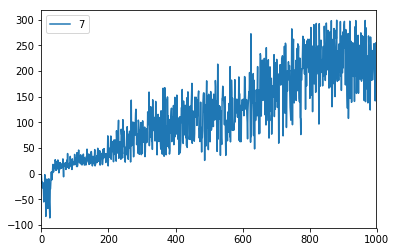

In [53]:
fig, ax = plt.subplots()
data_list[7]["AverageTestEpRet"].plot(ax=ax)
ax.legend([7])
# data_list[6]["AverageTestEpRet"].plot()

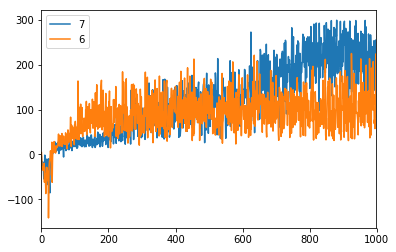

In [68]:
fig, ax = plt.subplots()
data_list[7]["AverageTestEpRet"].plot(ax=ax)
data_list[6]["AverageTestEpRet"].plot(ax=ax)
ax.legend([7, 6])

In [98]:
e = exp_compare(exp_info)
e

name    
seq                               15  20
state h0 beta tm repeat hidden          
128   0  0    1  3      400_300    4   3
      1  0    1  3      400_300    0   9
256   0  0    1  3      256_256    1  10
                        400_300    5    
      1  0    1  3      256_256    6    
                        400_300    8  11
512   0  0    1  3      400_300    2    
      1  0    1  3      400_300        7

In [94]:
def exp_plot(compare=[1, 2], item="AverageTestEpRet"):
    fig, ax = plt.subplots()
#     fig.size([10, 5])
    for x in compare:
        data_list[x][item].plot(ax=ax, figsize=(16, 9))
    ax.legend(compare)

In [95]:
data_list[0].columns

Index(['Epoch', 'Episode', 'name', 'AverageEpRet', 'StdEpRet', 'MaxEpRet',
       'MinEpRet', 'AverageTestEpRet', 'StdTestEpRet', 'MaxTestEpRet',
       'MinTestEpRet', 'EpLen', 'TestEpLen', 'TotalEnvInteracts', 'Alpha',
       'Averagemodel_loss', 'Stdmodel_loss', 'Maxmodel_loss', 'Minmodel_loss',
       'AverageQ1Vals', 'StdQ1Vals', 'MaxQ1Vals', 'MinQ1Vals', 'AverageQ2Vals',
       'StdQ2Vals', 'MaxQ2Vals', 'MinQ2Vals', 'AverageLogPi', 'StdLogPi',
       'MaxLogPi', 'MinLogPi', 'LossPi', 'LossQ1', 'LossQ2', 'Time'],
      dtype='object')

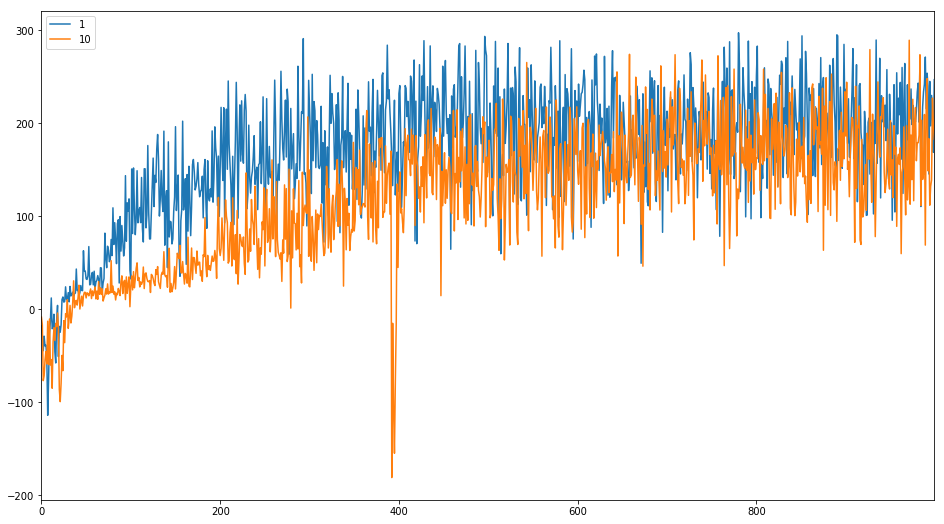

In [97]:
exp_plot([1, 10], "AverageTestEpRet")

# Put it together 

In [141]:
def read_dir(dir_path="/home/gu/project/DRL/data/cudnn_L1_BipedalWalkerHardcore-v2*_repeat_*"):
    pd.options.mode.chained_assignment = None   # ignore warning
    file_list = glob.glob(dir_path)             # get all name of files in data which follow our partten
    info = []   # extract name info e.g. seq hidden                                 
    for name in file_list:
        l = re.findall('\d+', name) 
        info.append([int(x) for x in l])
    
    progress_list = glob.glob(dir_path+"/*/")
    progress_list = [x + "progress.txt" for x in progress_list] # get */progress.txt
    data_list = [pd.read_csv(x, delimiter="\t") for x in progress_list]  # read all the data from */progree.txt
    
    # clean info
    info = pd.DataFrame(info)
    exp_info = info[[2, 3, 4, 5, 7, 10, 11, 12]]
    exp_info.columns=["seq", "h1", "h2", "state", "h0", "beta", "tm", "repeat"]
    exp_info.loc[:, "name"] = range(0, len(exp_info))
    exp_info["hidden"] = exp_info["h1"].apply(lambda x: str(x)+"_") + exp_info["h2"].apply(lambda x: str(x))
    exp_info = exp_info.drop(["h1", "h2"], axis=1)
    return exp_info, data_list

def exp_compare(dt, param="seq"):
    l = dt.columns
    d = dt.set_index(list(l[l != "name"])).sort_index().unstack(param).fillna("n")
    d[d=="n"] = ""
    return d

def exp_plot(dir_path="/home/gu/project/DRL/data/cudnn_L1_BipedalWalkerHardcore-v2*_repeat_*", 
             param="seq",
             compare=[1, 2], 
             item="AverageTestEpRet", 
             mode="plot",
             show_items=True):
    exp_info, data_list = read_dir(dir_path=dir_path)

    d = exp_compare(exp_info, param=param)
    if mode == "plot":
        fig, ax = plt.subplots()
        for x in compare:
            data_list[x][item].plot(ax=ax, figsize=(8, 5), title=item+"_"+param)
        ax.legend(compare)
        for c in compare:
            print(exp_info[exp_info.name==c])
    elif mode == "compare":
        if show_items:
            print(data_list[0].columns)
        return d    # if mode is compare return compare dataframe

In [142]:
exp_plot(mode="compare", param="h0")

Index(['Epoch', 'Episode', 'name', 'AverageEpRet', 'StdEpRet', 'MaxEpRet',
       'MinEpRet', 'AverageTestEpRet', 'StdTestEpRet', 'MaxTestEpRet',
       'MinTestEpRet', 'EpLen', 'TestEpLen', 'TotalEnvInteracts', 'Alpha',
       'Averagemodel_loss', 'Stdmodel_loss', 'Maxmodel_loss', 'Minmodel_loss',
       'AverageQ1Vals', 'StdQ1Vals', 'MaxQ1Vals', 'MinQ1Vals', 'AverageQ2Vals',
       'StdQ2Vals', 'MaxQ2Vals', 'MinQ2Vals', 'AverageLogPi', 'StdLogPi',
       'MaxLogPi', 'MinLogPi', 'LossPi', 'LossQ1', 'LossQ2', 'Time'],
      dtype='object')


name    
h0                                  0   1
seq state beta tm repeat hidden          
15  128   0    1  3      400_300    4   0
    256   0    1  3      256_256    1   6
                         400_300    5   8
    512   0    1  3      400_300    2    
20  128   0    1  3      400_300    3   9
    256   0    1  3      256_256   10    
                         400_300       11
    512   0    1  3      400_300        7

   seq  state  h0  beta  tm  repeat  name   hidden
3   20    128   0     0   1       3     3  400_300
   seq  state  h0  beta  tm  repeat  name   hidden
9   20    128   1     0   1       3     9  400_300


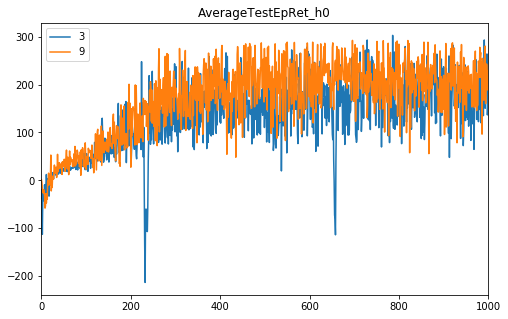

In [150]:
exp_plot(compare=[3, 9], param="h0")

   seq  state  h0  beta  tm  repeat  name   hidden
1   15    256   0     0   1       3     1  256_256
   seq  state  h0  beta  tm  repeat  name   hidden
6   15    256   1     0   1       3     6  256_256


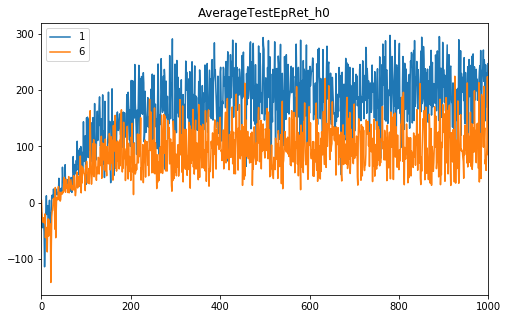

In [144]:
exp_plot(compare=[1, 6], param="h0")

   seq  state  h0  beta  tm  repeat  name   hidden
5   15    256   0     0   1       3     5  400_300
   seq  state  h0  beta  tm  repeat  name   hidden
8   15    256   1     0   1       3     8  400_300


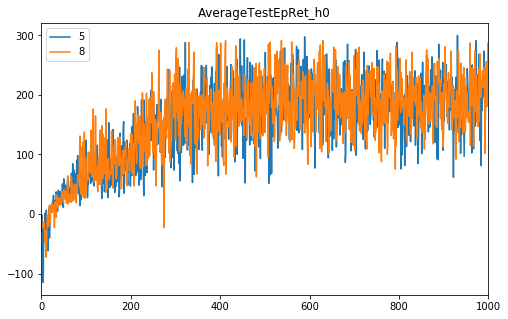

In [145]:
exp_plot(compare=[5, 8], param="h0")

   seq  state  h0  beta  tm  repeat  name   hidden
6   15    256   1     0   1       3     6  256_256
   seq  state  h0  beta  tm  repeat  name   hidden
8   15    256   1     0   1       3     8  400_300


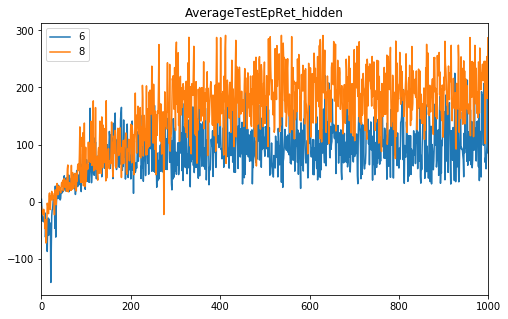

In [146]:
exp_plot(compare=[6, 8], param="hidden")

   seq  state  h0  beta  tm  repeat  name   hidden
1   15    256   0     0   1       3     1  256_256
   seq  state  h0  beta  tm  repeat  name   hidden
5   15    256   0     0   1       3     5  400_300


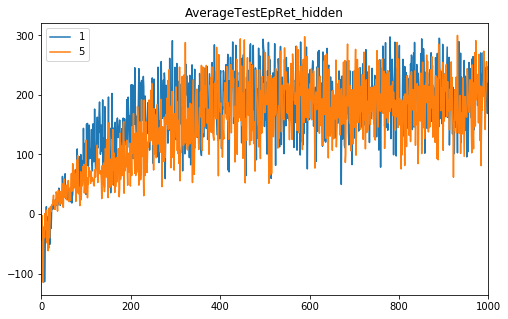

In [147]:
exp_plot(compare=[1, 5], param="hidden")

   seq  state  h0  beta  tm  repeat  name   hidden
1   15    256   0     0   1       3     1  256_256
   seq  state  h0  beta  tm  repeat  name   hidden
5   15    256   0     0   1       3     5  400_300


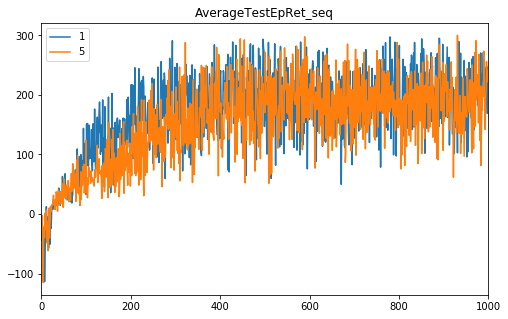

In [148]:
exp_plot(compare=[1, 5])

In [152]:
exp_plot(mode="compare", param="state")

Index(['Epoch', 'Episode', 'name', 'AverageEpRet', 'StdEpRet', 'MaxEpRet',
       'MinEpRet', 'AverageTestEpRet', 'StdTestEpRet', 'MaxTestEpRet',
       'MinTestEpRet', 'EpLen', 'TestEpLen', 'TotalEnvInteracts', 'Alpha',
       'Averagemodel_loss', 'Stdmodel_loss', 'Maxmodel_loss', 'Minmodel_loss',
       'AverageQ1Vals', 'StdQ1Vals', 'MaxQ1Vals', 'MinQ1Vals', 'AverageQ2Vals',
       'StdQ2Vals', 'MaxQ2Vals', 'MinQ2Vals', 'AverageLogPi', 'StdLogPi',
       'MaxLogPi', 'MinLogPi', 'LossPi', 'LossQ1', 'LossQ2', 'Time'],
      dtype='object')


name        
state                          128 256 512
seq h0 beta tm repeat hidden              
15  0  0    1  3      256_256        1    
                      400_300    4   5   2
    1  0    1  3      256_256        6    
                      400_300    0   8    
20  0  0    1  3      256_256       10    
                      400_300    3        
    1  0    1  3      400_300    9  11   7

   seq  state  h0  beta  tm  repeat  name   hidden
2   15    512   0     0   1       3     2  400_300
   seq  state  h0  beta  tm  repeat  name   hidden
4   15    128   0     0   1       3     4  400_300
   seq  state  h0  beta  tm  repeat  name   hidden
5   15    256   0     0   1       3     5  400_300


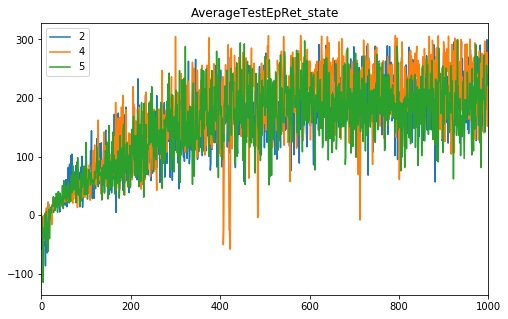

In [157]:
exp_plot(compare=[2, 4, 5], param="state")

   seq  state  h0  beta  tm  repeat  name   hidden
9   20    128   1     0   1       3     9  400_300
    seq  state  h0  beta  tm  repeat  name   hidden
11   20    256   1     0   1       3    11  400_300
   seq  state  h0  beta  tm  repeat  name   hidden
7   20    512   1     0   1       3     7  400_300


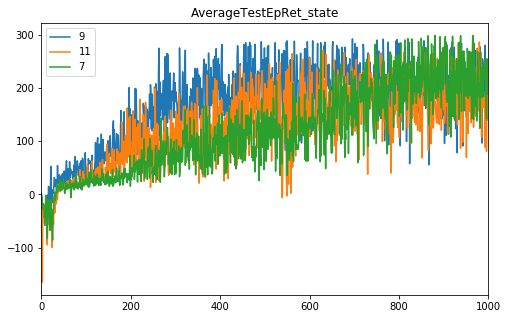

In [158]:
exp_plot(compare=[9, 11, 7], param="state")

# Analyse score

In [162]:
def read_dir(dir_path="/home/gu/project/DRL/data/cudnn_L1_BipedalWalkerHardcore-v2*_repeat_*"):
    pd.options.mode.chained_assignment = None   # ignore warning
    file_list = glob.glob(dir_path)             # get all name of files in data which follow our partten
    info = []   # extract name info e.g. seq hidden                                 
    for name in file_list:
        l = re.findall('\d+', name) 
        info.append([int(x) for x in l])
    
    progress_list = glob.glob(dir_path+"/*/")
    progress_list = [x + "progress.txt" for x in progress_list] # get */progress.txt
    data_list = [pd.read_csv(x, delimiter="\t") for x in progress_list]  # read all the data from */progree.txt
    
    # clean info
    info = pd.DataFrame(info)
    exp_info = info[[2, 3, 4, 5, 7, 10, 11, 12]]
    exp_info.columns=["seq", "h1", "h2", "state", "h0", "beta", "tm", "repeat"]
    exp_info.loc[:, "name"] = range(0, len(exp_info))
    exp_info["hidden"] = exp_info["h1"].apply(lambda x: str(x)+"_") + exp_info["h2"].apply(lambda x: str(x))
    exp_info = exp_info.drop(["h1", "h2"], axis=1)
    return exp_info, data_list

def exp_compare(dt, param="seq"):
    l = dt.columns
    d = dt.set_index(list(l[l != "name"])).sort_index().unstack(param).fillna("n")
    d[d=="n"] = ""
    return d

def exp_compare_(dt, param="seq"):
    l = dt.columns
    d = dt.set_index(list(l)).sort_index().unstack(param).fillna("n")
    d[d=="n"] = ""
    return d

def exp_plot(dir_path="/home/gu/project/DRL/data/cudnn_L1_BipedalWalkerHardcore-v2*_repeat_*", 
             param="seq",
             compare=[1, 2], 
             item="AverageTestEpRet", 
             mode="plot",
             show_items=True):
    exp_info, data_list = read_dir(dir_path=dir_path)

    d = exp_compare(exp_info, param=param)
    if mode == "plot":
        fig, ax = plt.subplots()
        for x in compare:
            data_list[x][item].plot(ax=ax, figsize=(8, 5), title=item+"_"+param)
        ax.legend(compare)
        for c in compare:
            print(exp_info[exp_info.name==c])
    elif mode == "compare":
        if show_items:
            print(data_list[0].columns)
        return d    # if mode is compare return compare dataframe

In [207]:
df, dt = read_dir()
df

,seq,state,h0,beta,tm,repeat,name,hidden
0,15,128,1,0,1,3,0,400_300
1,15,256,0,0,1,3,1,256_256
2,15,512,0,0,1,3,2,400_300
3,20,128,0,0,1,3,3,400_300
4,15,128,0,0,1,3,4,400_300
5,15,256,0,0,1,3,5,400_300
6,15,256,1,0,1,3,6,256_256
7,20,512,1,0,1,3,7,400_300
8,15,256,1,0,1,3,8,400_300
9,20,128,1,0,1,3,9,400_300


In [222]:
score = [x.loc[900:, "AverageTestEpRet"].mean() for x in dt]
score

[116.11075822000001,
 199.35328495000002,
 214.58304395,
 175.37091122,
 230.76662325,
 187.32579322,
 110.50820377999999,
 216.62347305999995,
 196.15746021000004,
 207.03404859000003,
 165.87149115,
 187.45194210999998]

In [223]:
df["score"] = score
df

,seq,state,h0,beta,tm,repeat,hidden,score
0,15,128,1,0,1,3,400_300,116.110758
1,15,256,0,0,1,3,256_256,199.353285
2,15,512,0,0,1,3,400_300,214.583044
3,20,128,0,0,1,3,400_300,175.370911
4,15,128,0,0,1,3,400_300,230.766623
5,15,256,0,0,1,3,400_300,187.325793
6,15,256,1,0,1,3,256_256,110.508204
7,20,512,1,0,1,3,400_300,216.623473
8,15,256,1,0,1,3,400_300,196.157460
9,20,128,1,0,1,3,400_300,207.034049


In [258]:
df.iloc[-5:, :]

,seq,state,h0,beta,tm,repeat,hidden,score
7,20,512,1,0,1,3,400_300,216.623473
8,15,256,1,0,1,3,400_300,196.157460
9,20,128,1,0,1,3,400_300,207.034049
10,20,256,0,0,1,3,256_256,165.871491
11,20,256,1,0,1,3,400_300,187.451942


In [224]:
l = df.columns
# df = df.drop(["name"], axis=1)
df.set_index(list(l[l != "score"])).sort_index().unstack("state").fillna("")

score                  
state                              128      256      512
seq h0 beta tm repeat hidden                            
15  0  0    1  3      256_256           199.353         
                      400_300  230.767  187.326  214.583
    1  0    1  3      256_256           110.508         
                      400_300  116.111  196.157         
20  0  0    1  3      256_256           165.871         
                      400_300  175.371                  
    1  0    1  3      400_300  207.034  187.452  216.623

# Class

In [253]:
class Exp_analyse:
    
    
    def __init__(self, dir_path="/home/gu/project/DRL/data/cudnn_L1_BipedalWalkerHardcore-v2*_repeat_*"):
        pd.options.mode.chained_assignment = None   # ignore warning
        self.dir_path = dir_path
        self.param = None
        self.data_list = None
        self.exp_info = None
        self.compare_df = None
        
    def read_dir(self):
    
        file_list = glob.glob(self.dir_path)             # get all name of files in data which follow our partten
        info = []   # extract name info e.g. seq hidden                                 
        for name in file_list:
            l = re.findall('\d+', name) 
            info.append([int(x) for x in l])

        progress_list = glob.glob(dir_path+"/*/")
        progress_list = [x + "progress.txt" for x in progress_list] # get */progress.txt
        self.data_list = [pd.read_csv(x, delimiter="\t") for x in progress_list]  # read all the data from */progree.txt

        # clean info
        info = pd.DataFrame(info)
        exp_info = info[[2, 3, 4, 5, 7, 10, 11, 12]]
        exp_info.columns=["seq", "h1", "h2", "state", "h0", "beta", "tm", "repeat"]
        exp_info.loc[:, "name"] = range(0, len(exp_info))
        exp_info["hidden"] = exp_info["h1"].apply(lambda x: str(x)+"_") + exp_info["h2"].apply(lambda x: str(x))
        self.exp_info = exp_info.drop(["h1", "h2"], axis=1)
        return self.exp_info, self.data_list

    def exp_compare(self, param="seq"):
        self.param = param
        if self.exp_info is None:
            _,_ = self.read_dir()
        l = self.exp_info.columns # column name
        compare_df = dt.set_index(list(l[l != "name"])).sort_index().unstack(param).fillna("n")
        compare_df[compare_df=="n"] = ""
        self.compare_df = compare_df
        return self.compare_df


    def exp_plot(self,
                 compare=[1, 2], 
                 item="AverageTestEpRet", 
                 show_items=True):

        d = self.compare_df
        if self.param is None:
            _ = self.exp_compare
            
        for x in compare:
            self.data_list[x][item].plot(ax=ax, figsize=(8, 5), title=item+"_"+param)
        ax.legend(compare)
        for c in compare:
            print(self.exp_info[self.exp_info.name==c])



In [254]:
exp_a = Exp_analyse()

In [255]:
exp_a.exp_plot()

TypeError: 'NoneType' object is not subscriptable